In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
df_socioeconomico = pd.read_csv('../data2/SCFP2019.csv')

df_socioeconomico

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,5813,58131,667.098300,1,51,3,5,1,1,0,...,5,6,6,6,3,11,11,11,4,4
28881,5813,58132,678.821856,1,51,3,5,1,1,0,...,5,6,6,6,3,11,11,11,4,4
28882,5813,58133,640.908142,1,51,3,5,1,1,0,...,5,6,6,6,3,11,11,11,4,4
28883,5813,58134,665.152072,1,51,3,5,1,1,0,...,5,6,6,6,3,11,11,11,4,4


In [3]:
df_socioeconomico['Activos_sin_riesgo']= df_socioeconomico['LIQ'] + df_socioeconomico['CDS'] + df_socioeconomico['SAVBND'] + df_socioeconomico['CASHLI']
df_socioeconomico['Activos_con_riesgo'] = df_socioeconomico['NMMF'] + df_socioeconomico['STOCKS'] + df_socioeconomico['BOND'] + df_socioeconomico['OTHMA']+ df_socioeconomico['OTHNFIN']+ df_socioeconomico['NNRESRE']+ df_socioeconomico['BUS']+ df_socioeconomico['ORESRE']
df_socioeconomico['Tolerancia_riesgo'] = df_socioeconomico['Activos_con_riesgo']/(df_socioeconomico['Activos_con_riesgo']+df_socioeconomico['Activos_sin_riesgo'])

In [4]:
df_socioeconomico

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,Activos_sin_riesgo,Activos_con_riesgo,Tolerancia_riesgo
0,1,11,6119.779308,2,75,6,12,4,2,0,...,3,2,10,6,6,3,3,75000,941000.0,0.926181
1,1,12,4712.374912,2,75,6,12,4,2,0,...,3,1,10,5,5,2,2,79000,901000.0,0.919388
2,1,13,5145.224455,2,75,6,12,4,2,0,...,3,1,10,5,5,2,2,79000,929000.0,0.921627
3,1,14,5297.663412,2,75,6,12,4,2,0,...,2,1,10,4,4,2,2,78000,1332000.0,0.944681
4,1,15,4761.812371,2,75,6,12,4,2,0,...,3,1,10,5,5,2,2,77000,959000.0,0.925676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,5813,58131,667.098300,1,51,3,5,1,1,0,...,6,3,11,11,11,4,4,2159000,4885000.0,0.693498
28881,5813,58132,678.821856,1,51,3,5,1,1,0,...,6,3,11,11,11,4,4,2171000,5000000.0,0.697253
28882,5813,58133,640.908142,1,51,3,5,1,1,0,...,6,3,11,11,11,4,4,2163000,4827000.0,0.690558
28883,5813,58134,665.152072,1,51,3,5,1,1,0,...,6,3,11,11,11,4,4,2162000,5250000.0,0.708311


In [5]:
print('Null Values =',df_socioeconomico.isnull().values.any())

Null Values = True


In [6]:
df_socioeconomico=df_socioeconomico.dropna(axis=0)

In [7]:
print('Null Values =',df_socioeconomico.isnull().values.any())

Null Values = False


In [8]:
df_socioeconomico

,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,Activos_sin_riesgo,Activos_con_riesgo,Tolerancia_riesgo
0,1,11,6119.779308,2,75,6,12,4,2,0,...,3,2,10,6,6,3,3,75000,941000.0,0.926181
1,1,12,4712.374912,2,75,6,12,4,2,0,...,3,1,10,5,5,2,2,79000,901000.0,0.919388
2,1,13,5145.224455,2,75,6,12,4,2,0,...,3,1,10,5,5,2,2,79000,929000.0,0.921627
3,1,14,5297.663412,2,75,6,12,4,2,0,...,2,1,10,4,4,2,2,78000,1332000.0,0.944681
4,1,15,4761.812371,2,75,6,12,4,2,0,...,3,1,10,5,5,2,2,77000,959000.0,0.925676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,5813,58131,667.098300,1,51,3,5,1,1,0,...,6,3,11,11,11,4,4,2159000,4885000.0,0.693498
28881,5813,58132,678.821856,1,51,3,5,1,1,0,...,6,3,11,11,11,4,4,2171000,5000000.0,0.697253
28882,5813,58133,640.908142,1,51,3,5,1,1,0,...,6,3,11,11,11,4,4,2163000,4827000.0,0.690558
28883,5813,58134,665.152072,1,51,3,5,1,1,0,...,6,3,11,11,11,4,4,2162000,5250000.0,0.708311


<AxesSubplot:xlabel='Tolerancia_riesgo', ylabel='Count'>

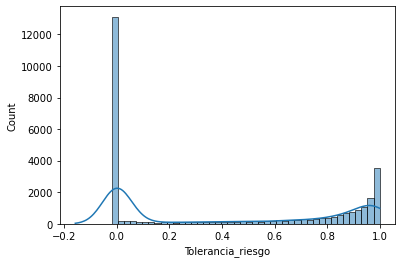

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_socioeconomico['Tolerancia_riesgo'], bins=50, kde=True)

In [10]:
import copy
df_socioeconomico2 = copy.deepcopy(df_socioeconomico)  

In [11]:
Columnas = ['AGECL','EDCL','MARRIED','KIDS','OCCAT1','HHSEX', 'RACE', 'KNOWL','NWCAT','INCCAT','YESFINRISK','NOFINRISK','Tolerancia_riesgo']

drop_list2 = [i for i in df_socioeconomico2.columns if i not in Columnas]

df_socioeconomico2.drop(labels=drop_list2, axis=1, inplace=True)

In [32]:
Columnas

['AGECL',
 'EDCL',
 'MARRIED',
 'KIDS',
 'OCCAT1',
 'HHSEX',
 'RACE',
 'KNOWL',
 'NWCAT',
 'INCCAT',
 'YESFINRISK',
 'NOFINRISK',
 'Tolerancia_riesgo']

In [12]:
df_socioeconomico2

,HHSEX,AGECL,EDCL,MARRIED,KIDS,RACE,OCCAT1,KNOWL,YESFINRISK,NOFINRISK,NWCAT,INCCAT,Tolerancia_riesgo
0,2,6,4,2,0,1,1,6,0,0,5,3,0.926181
1,2,6,4,2,0,1,1,6,0,0,5,3,0.919388
2,2,6,4,2,0,1,1,6,0,0,5,3,0.921627
3,2,6,4,2,0,1,1,6,0,0,5,2,0.944681
4,2,6,4,2,0,1,1,6,0,0,5,3,0.925676
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28880,1,3,1,1,0,1,2,7,0,1,5,6,0.693498
28881,1,3,1,1,0,1,2,7,0,1,5,6,0.697253
28882,1,3,1,1,0,1,2,7,0,1,5,6,0.690558
28883,1,3,1,1,0,1,2,7,0,1,5,6,0.708311


In [13]:
df_socioeconomico2.to_csv('../data2/datos_socioeconomicos.csv')

<AxesSubplot:title={'center':'Correlation Matrix'}>

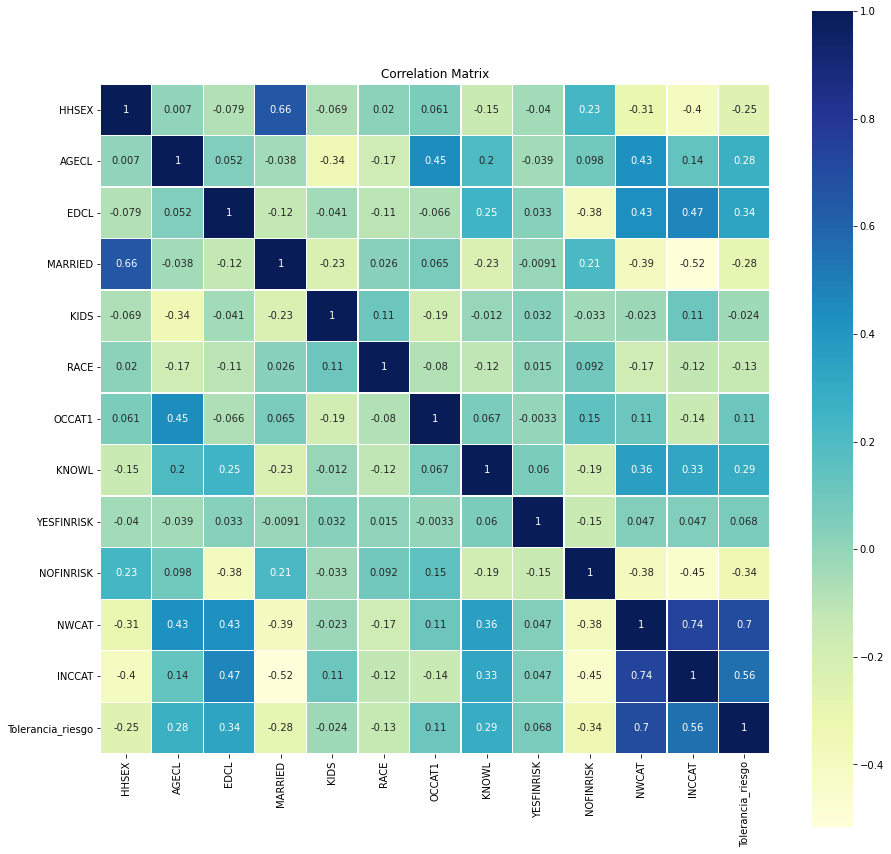

In [14]:
correlation = df_socioeconomico2.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='YlGnBu', linewidths=.3)

In [15]:
FEATS = ['AGECL','EDCL','MARRIED','KIDS','OCCAT1','HHSEX', 'RACE', 'KNOWL','NWCAT','INCCAT','YESFINRISK','NOFINRISK']
TARGET = 'Tolerancia_riesgo'

In [16]:
numeric_transformer = \
Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), 
                ('scaler', StandardScaler())])

In [17]:
preprocessor = \
ColumnTransformer(transformers=[('num', numeric_transformer, FEATS)])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
df_socioeconomico2_train, df_socioeconomico2_test = train_test_split(df_socioeconomico2)

In [20]:
print(df_socioeconomico2_train.shape)
print(df_socioeconomico2_test.shape)

(21399, 13)
(7133, 13)


In [21]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

model= Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', RandomForestRegressor())])

In [22]:
model.fit(df_socioeconomico2_train[FEATS], df_socioeconomico2_train[TARGET]);

In [23]:
y_test = model.predict(df_socioeconomico2_test[FEATS])
y_train = model.predict(df_socioeconomico2_train[FEATS])

In [25]:
from sklearn.metrics import mean_squared_error
print(f"test error: {mean_squared_error(y_pred=y_test, y_true=df_socioeconomico2_test[TARGET], squared=False)}")
print(f"train error: {mean_squared_error(y_pred=y_train, y_true=df_socioeconomico2_train[TARGET], squared=False)}")

test error: 0.13246916775237283
train error: 0.10299311444622142


In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
scores = cross_val_score(model,  
                         df_socioeconomico2[FEATS], 
                         df_socioeconomico2[TARGET], 
                         scoring='neg_root_mean_squared_error', 
                         cv=10, n_jobs=-1)

In [28]:
import numpy as np
np.mean(-scores)

0.33588896951295333

In [29]:
import eli5

In [30]:
eli5.show_weights(model.named_steps['regressor'], feature_names=FEATS)

Weight,Feature
0.5445 ± 0.0120,NWCAT
0.0897 ± 0.0099,KNOWL
0.0674 ± 0.0088,AGECL
0.0666 ± 0.0083,INCCAT
0.0509 ± 0.0096,EDCL
0.0450 ± 0.0067,KIDS
0.0402 ± 0.0056,OCCAT1
0.0323 ± 0.0073,RACE
0.0205 ± 0.0049,MARRIED
0.0187 ± 0.0069,NOFINRISK


In [31]:
from pickle import dump
from pickle import load

filename = 'Modelo_aprendizaje_supervisado.sav'
dump(model, open(filename, 'wb'))

In [38]:
df_socioeconomico2['INCCAT'].unique()

array([3, 2, 4, 1, 6, 5])